In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


Variables

In [ ]:
omega_one=[]
omega_two=[]
omega_one_phi=[]
omega_two_phi=[]
lr = np.arange(0.1,1.1,0.1)



**Upload And path setup**

In [ ]:
train_df=pd.read_csv("/content/train-perceptron.txt",sep=" " ,names=["x1","x2","Y"])





**Traning Data Separation**

In [ ]:
def class_separation(df):
  for i in range(0,len(df)):
    li=[]
    if df['Y'][i]==1:
      li=df['x1'][i],df['x2'][i]
      omega_one.append(li)
    elif df['Y'][i]==2: 
      li=df['x1'][i],df['x2'][i] 
      omega_two.append(li) 

**Many at a Time**

In [ ]:
def batch_update(learning_rate,weights):
    correctly_classified=False
    miss_classified=0
    iteration=0
    while correctly_classified==False and iteration<=200:
      miss_classified = 0
      sum_weights=np.zeros(6)
      for i in range(len(phi)):
        if (np.dot(weights,phi[i])) <= 0:
              sum_weights = np.add(sum_weights , phi[i])
              miss_classified +=1
      if miss_classified == 0:
        correctly_classified = True
      else:
        correctly_classified=False
        weights = weights + np.dot(learning_rate , sum_weights)  
      iteration += 1

    return iteration     

      

  

**One at a Time**

In [ ]:
def single_update(learning_rate,weights):
    correctly_classified=False
    iteration=0
    while correctly_classified==False and iteration<=200:
      miss_classified=0
      for i in range(len(phi)):
        if (np.dot(weights,phi[i])) <= 0:
              weights = weights + np.dot(learning_rate,phi[i])
              miss_classified +=1
      if miss_classified == 0:
        correctly_classified = True
      iteration += 1

    return iteration     

      

  

**Phi Function Claculation**

In [ ]:
def phi(omega_value):
  return [pow(omega_value[0],2),pow(omega_value[1],2),omega_value[0]*omega_value[1],omega_value[0],omega_value[1],1]



**Table Show**

In [ ]:
def table_show(learning_rate,many_at_a_time,one_at_a_time):

  dict = {'Learning rate': learning_rate, 'Many at a time': many_at_a_time, 'One at a time': one_at_a_time}
  dataframe = pd.DataFrame(dict)

  print(dataframe.to_string(index=False))


**Perception comparison**

In [ ]:
def perception_comparison(learning_rate,many_at_a_time,one_at_a_time):
  labels=[]
  for i in learning_rate:
    labels.append(str(round(i,2)))
  x = np.arange(len(lr))  
  width = 0.35
  fig, ax = plt.subplots()

  fig.set_size_inches(8,6)
  ax.bar(x - width/2, one_at_a_time, width, label='One at a time')
  ax.bar(x + width/2, many_at_a_time, width, label='Many at a time')

  ax.set_xlabel('Learning rate')
  ax.set_ylabel('No of iterations')
  ax.set_title('Perception comparison')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  plt.show()

**Separating Class**

In [ ]:
class_separation(train_df)



**Plotting Classes without Decision Boundary**

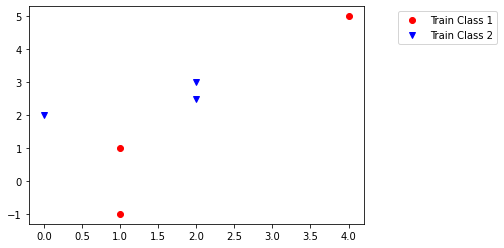

In [ ]:
plt.plot(*zip(*omega_one),'ro',label="Train Class 1")
plt.plot(*zip(*omega_two),"bv",label="Train Class 2")
plt.legend(loc="upper center",bbox_to_anchor=(1.25, 1))
plt.show()

**Plotting Classes with Decision Boundary**

In [ ]:
minimum=min(min(train_df["x1"]),min(train_df["x2"]))
maximum=max(max(train_df["x1"]),max(train_df["x2"]))
x=[]
y=[]
m=0.5
c=2
for i in range(int(minimum),int(maximum+1)):
  x.append(i)
  y.append(m*i+c)



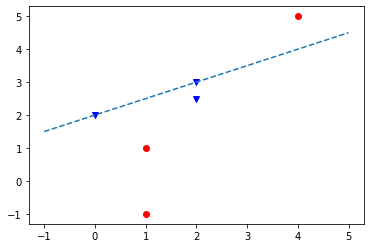

In [ ]:
plt.plot(*zip(*omega_one),'ro',label="Train Class 1")
plt.plot(*zip(*omega_two),"bv",label="Train Class 2")
plt.plot(x,y,"--",label="Decision Boundary")

plt.show()

**Generate the high dimensional sample points**

In [ ]:
for omega in omega_one:
  omega_one_phi.append(phi(omega))
for omega in omega_two:
  omega_two_phi.append(phi(omega))
normalize_omega_two=np.array(omega_two_phi).dot(-1)
phi = np.concatenate((np.array(omega_one_phi), normalize_omega_two))


**All Weights Zero**

In [ ]:
single_iter=[]
weights=np.zeros(6)
for i in lr:
  iter= single_update(i,weights)
  single_iter.append(iter)
batch_iter=[]
for i in lr:
  iter= batch_update(i,weights)
  batch_iter.append(iter)
table_show(lr,batch_iter,single_iter)


 Learning rate  Many at a time  One at a time
           0.1             105             94
           0.2             105             94
           0.3              92             94
           0.4             105             94
           0.5              92             94
           0.6             105             94
           0.7             105             94
           0.8             105             94
           0.9             105             94
           1.0              92             94


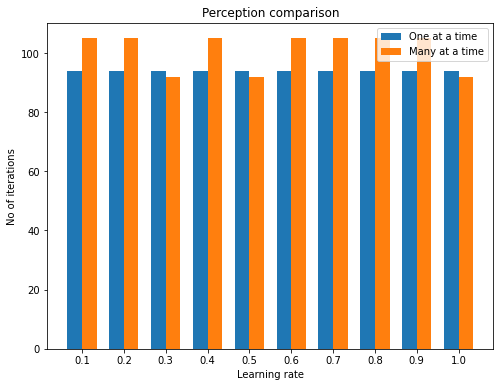

In [ ]:
perception_comparison(lr,batch_iter,single_iter)


**All Weights One**

In [ ]:
single_iter=[]
weights=np.ones(6)
for i in lr:
  iter= single_update(i,weights)
  single_iter.append(iter)
batch_iter=[]
for i in lr:
  iter= batch_update(i,weights)
  batch_iter.append(iter)
table_show(lr,batch_iter,single_iter)

 Learning rate  Many at a time  One at a time
           0.1             102              6
           0.2             104             92
           0.3              91            104
           0.4             116            106
           0.5             105             93
           0.6             114             93
           0.7              91            108
           0.8              91            115
           0.9             105             94
           1.0              93             94


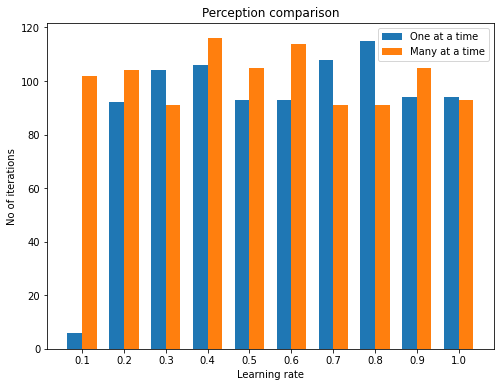

In [ ]:
perception_comparison(lr,batch_iter,single_iter)

**Random Weights**

In [ ]:
single_iter=[]
weights=[]
np.random.seed(6)
for i in range(6):
  weights.append(random.randint(0, 6))
for i in lr:
  iter= single_update(i,weights)
  single_iter.append(iter)
batch_iter=[]
for i in lr:
  iter= batch_update(i,weights)
  batch_iter.append(iter)
table_show(lr,batch_iter,single_iter)

 Learning rate  Many at a time  One at a time
           0.1              36             32
           0.2              96             71
           0.3             121             16
           0.4              91             81
           0.5              87             96
           0.6              87              6
           0.7              85              7
           0.8             103             79
           0.9               4             98
           1.0             121            105


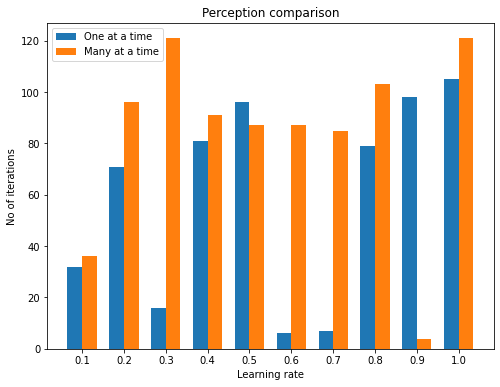

In [ ]:
perception_comparison(lr,batch_iter,single_iter)